In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)


## Data Description As found in kaggle 

In [15]:
diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
diamonds = diamonds.drop(["Unnamed: 0"],axis=1)

In [17]:
diamonds = diamonds.rename(columns = {'depth': 'total_depth','x': 'lenght_mm','y': 'width_mm','z': 'depth_mm'}, inplace = False)
diamonds

,carat,cut,color,clarity,total_depth,table,price,lenght_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut          53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   total_depth  53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   lenght_mm    53940 non-null  float64
 8   width_mm     53940 non-null  float64
 9   depth_mm     53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
diamonds.describe()

,carat,total_depth,table,price,lenght_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
diamonds.isnull().sum()

carat          0
cut            0
color          0
clarity        0
total_depth    0
table          0
price          0
lenght_mm      0
width_mm       0
depth_mm       0
dtype: int64

## Some Data Pre-Processing 

In [21]:
diamonds.loc[(diamonds['lenght_mm']==0) | (diamonds['width_mm']==0) | (diamonds['depth_mm']==0)]


,carat,cut,color,clarity,total_depth,table,price,lenght_mm,width_mm,depth_mm
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [22]:
len(diamonds.loc[(diamonds['lenght_mm']==0) | (diamonds['width_mm']==0) | (diamonds['depth_mm']==0)]) 
## So I have around 20 observation with either lenght, width or depth with zeros. However, there is corresponding 
## diamonds prices, which does not make sence. Therefore, I will replace them with their median values 
## so I will not lose any observations 

20

In [23]:
diamonds["lenght_mm"] = np.where(diamonds["lenght_mm"]==0,diamonds["lenght_mm"].median(),diamonds["lenght_mm"])
diamonds["width_mm"] = np.where(diamonds["width_mm"]==0,diamonds["width_mm"].median(),diamonds["width_mm"])
diamonds["depth_mm"] = np.where(diamonds["depth_mm"]==0,diamonds["depth_mm"].median(),diamonds["depth_mm"])

In [24]:
diamonds.describe()

,carat,total_depth,table,price,lenght_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732003,5.735267,3.540043
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Visualization Before label Encoding 

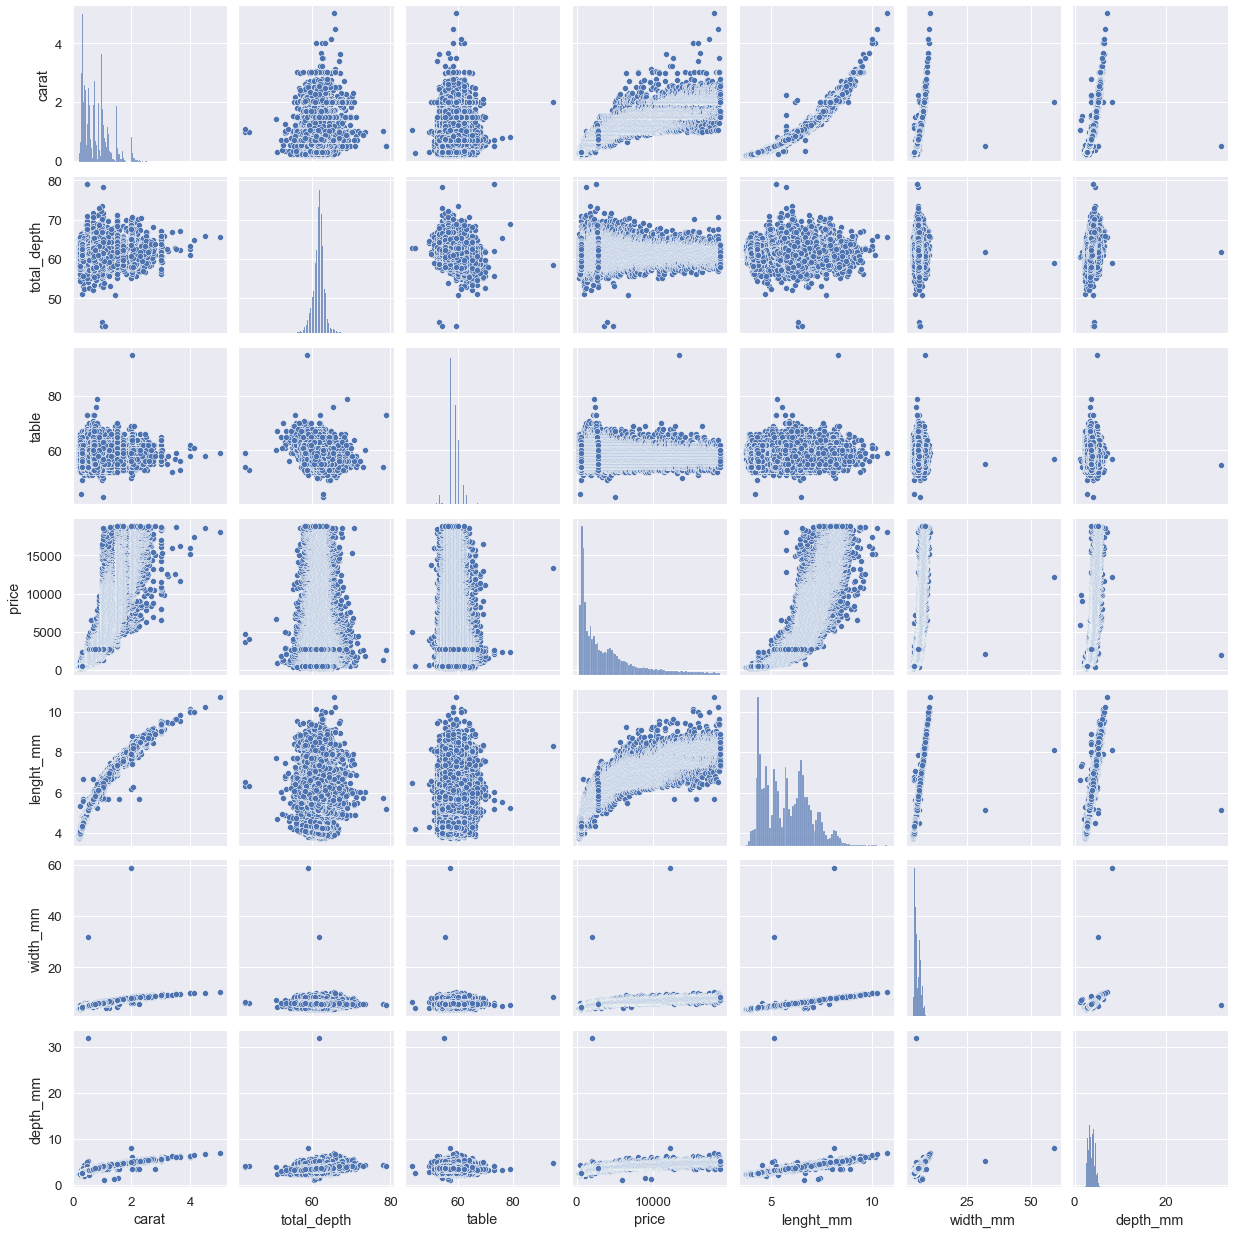

In [25]:
sns.pairplot(diamonds) # It seems from the pairplot that features such as carat, total_depth, table, lenght_mm, 
# width_mm, depth_mm are in a need to be scaled or even it is more appropiate to take the log of the features 

In [28]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [29]:
diamonds.describe()

,carat,total_depth,table,price,lenght_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732003,5.735267,3.540043
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


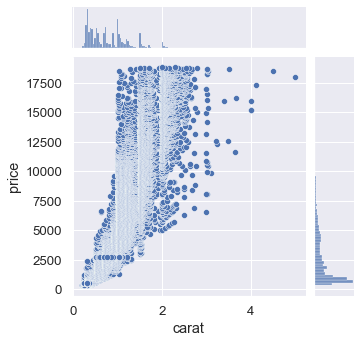

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


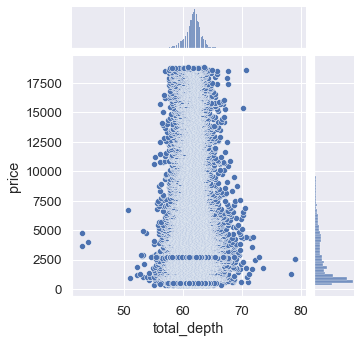

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


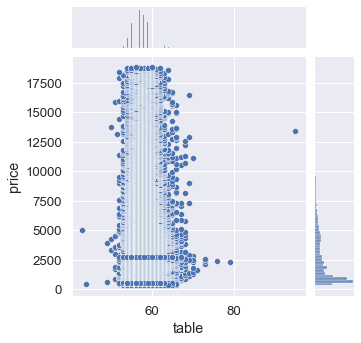

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


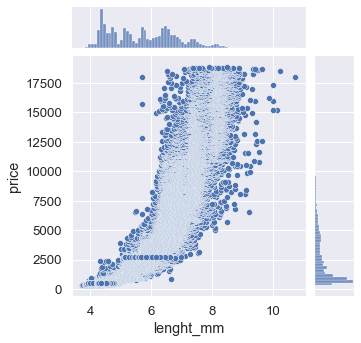

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


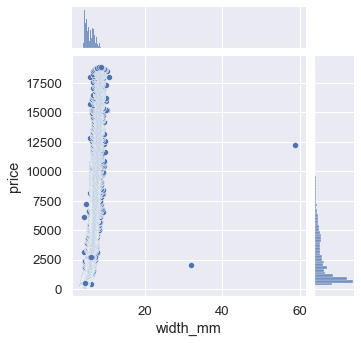

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


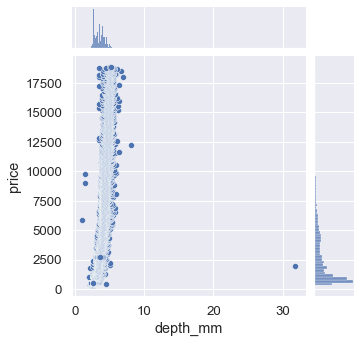

In [30]:
continous = ["carat", "total_depth", "table","lenght_mm", "width_mm", "depth_mm"]

for l in continous:
    sns.jointplot(x= l, y='price' , data=diamonds , kind= 'scatter', size=5)
    plt.show()
    


In [31]:
sns.set(rc={'figure.figsize': [12, 12]}, font_scale=1.2)
sns.set_theme(style="darkgrid")

## Feature Enginnering 

(2.0, 10.0)

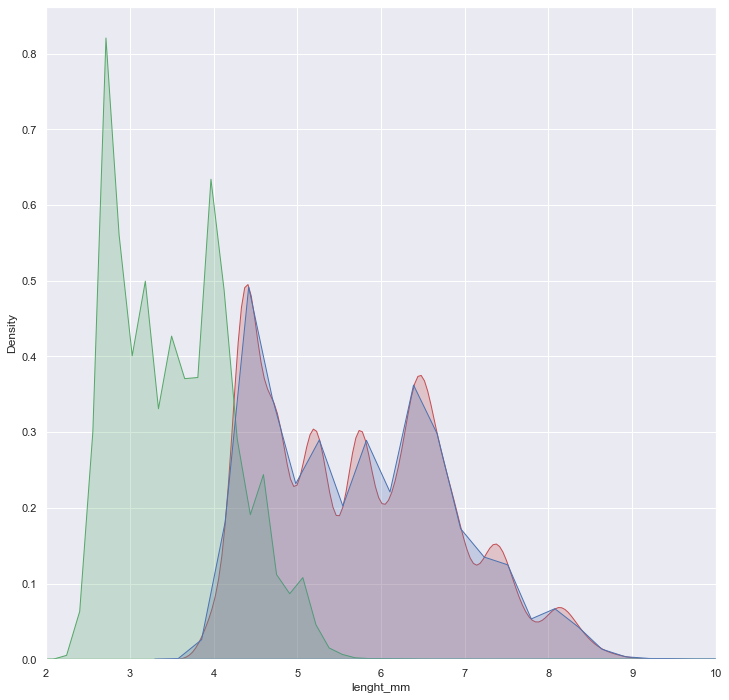

In [32]:
sns.kdeplot(diamonds['lenght_mm'] ,shade=True , color='r' )
sns.kdeplot(diamonds['depth_mm'] , shade=True , color='g' )
sns.kdeplot(diamonds['width_mm'] , shade= True , color='b')
plt.xlim(2,10)
# Since we are going to combine the lenght_mm, depth_mm and width_mm are closely related to each other, it 
# seems a good idea to combine the 3 together and having a volume that represents every diamond volume

In [36]:
diamonds['volume'] = diamonds['lenght_mm']*diamonds['width_mm']*diamonds['depth_mm']

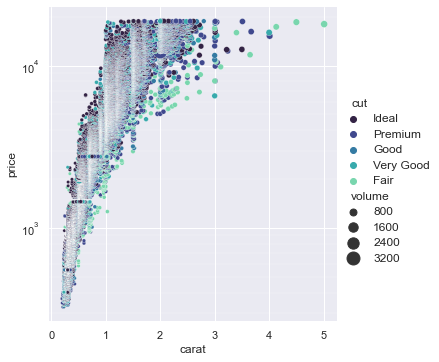

In [37]:
g = sns.relplot(
    data=diamonds,
    x="carat", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

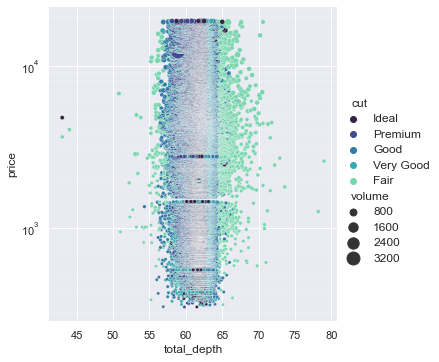

In [38]:
g = sns.relplot(
    data=diamonds,
    x="total_depth", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

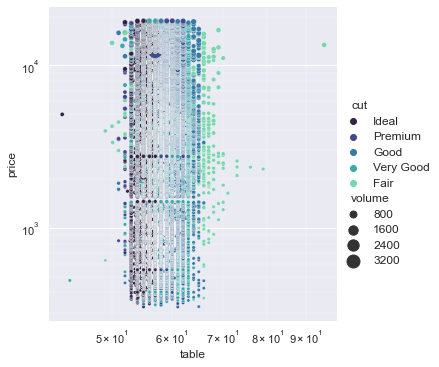

In [39]:
g = sns.relplot(
    data=diamonds,
    x="table", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

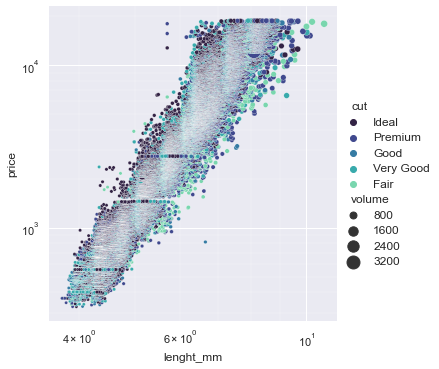

In [40]:
g = sns.relplot(
    data=diamonds,
    x="lenght_mm", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

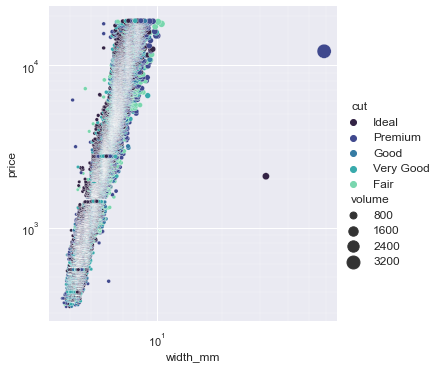

In [41]:
g = sns.relplot(
    data=diamonds,
    x="width_mm", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

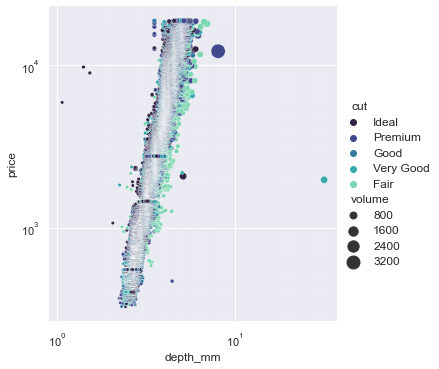

In [42]:
g = sns.relplot(
    data=diamonds,
    x="depth_mm", y="price",
    hue="cut", size="volume",
    palette="mako", sizes=(10, 200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

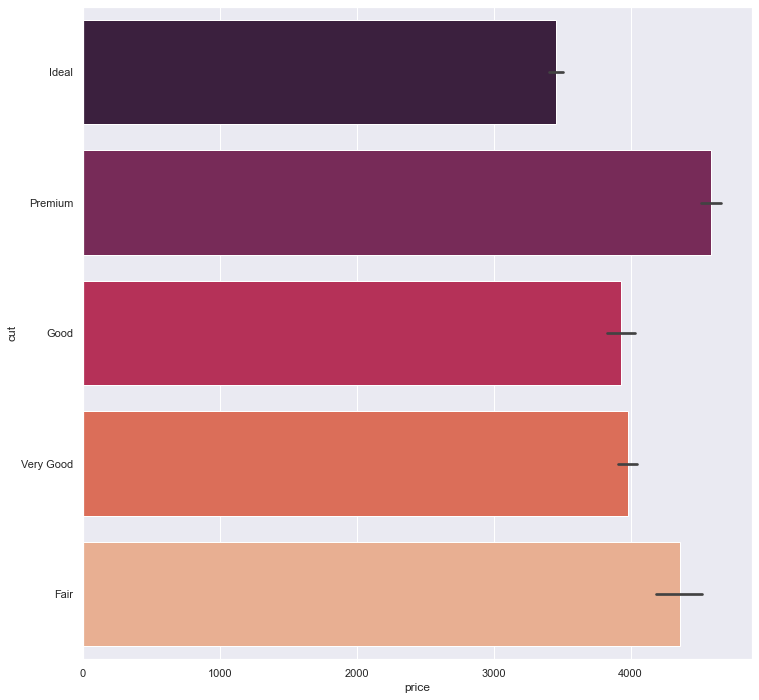

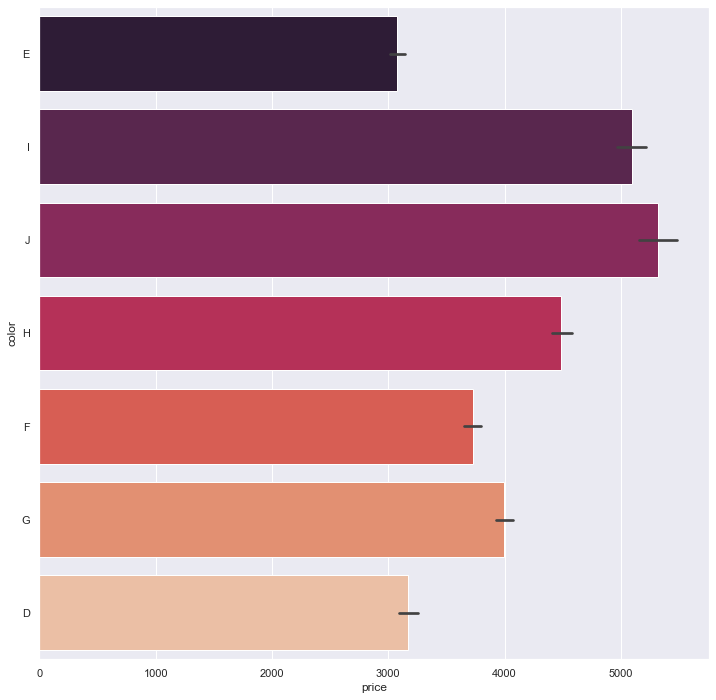

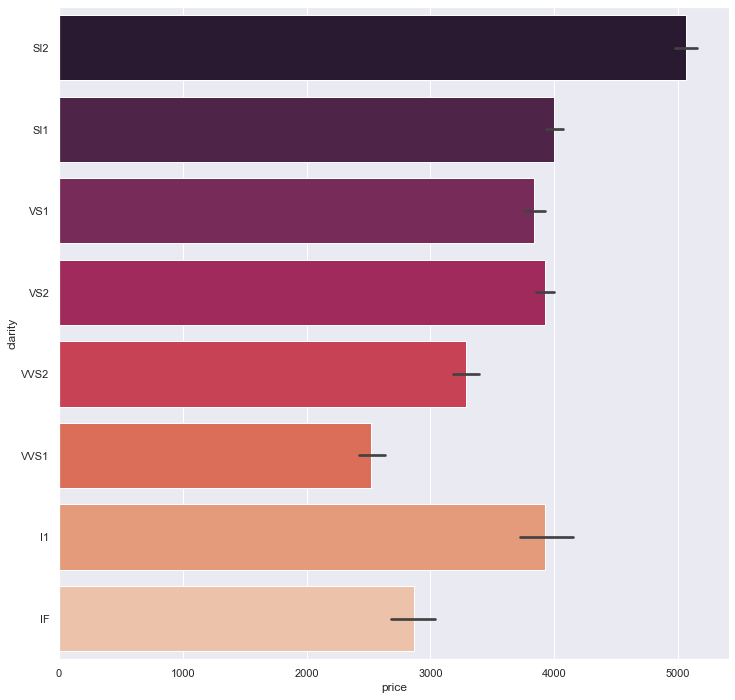

In [32]:
categories = ["cut", "color", "clarity"]

for z in categories:
    sns.barplot(x= "price", y = z,data = diamonds, palette='rocket')
    plt.show()

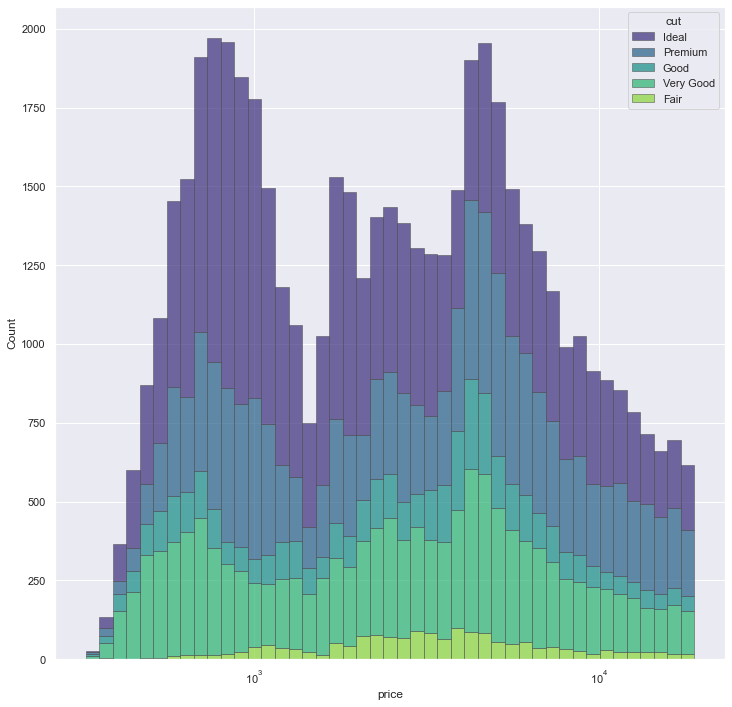

In [43]:
sns.histplot(diamonds,x="price", hue="cut",multiple="stack",palette="viridis",edgecolor=".3",
    linewidth=.5,log_scale=True)

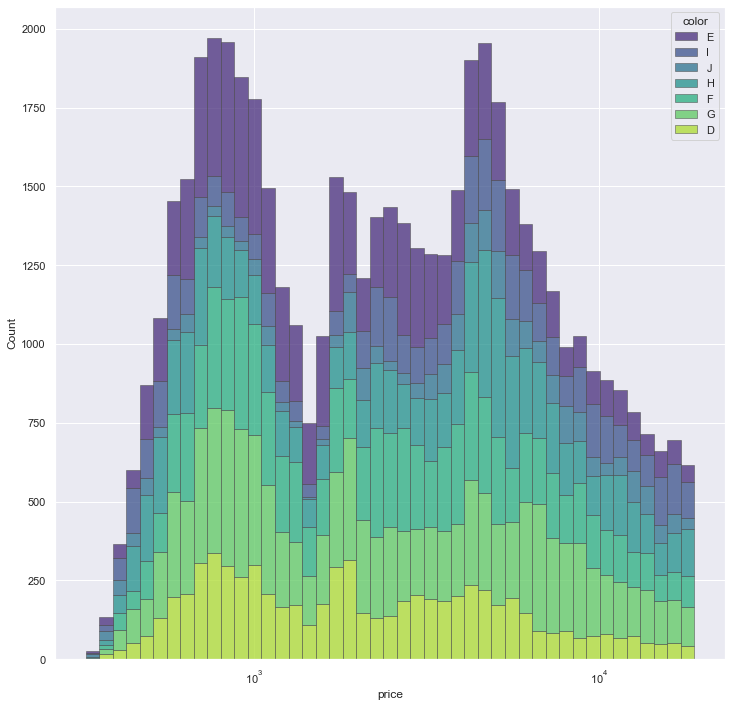

In [44]:
sns.histplot(diamonds,x="price", hue="color",multiple="stack",palette="viridis",edgecolor=".3",
    linewidth=.5,log_scale=True)

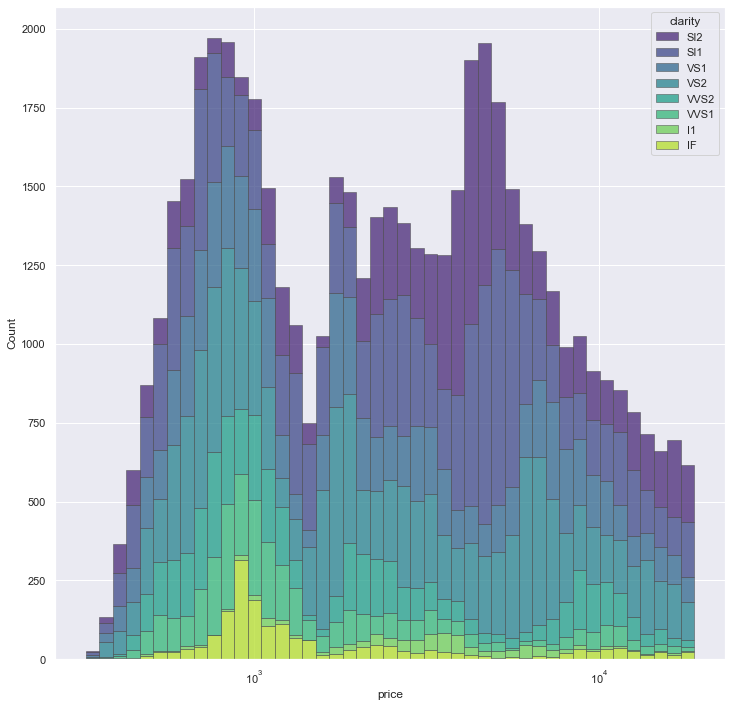

In [45]:
sns.histplot(diamonds,x="price", hue="clarity",multiple="stack",palette="viridis",edgecolor=".3",
    linewidth=.5,log_scale= True)

In [47]:
corr = diamonds.corr()

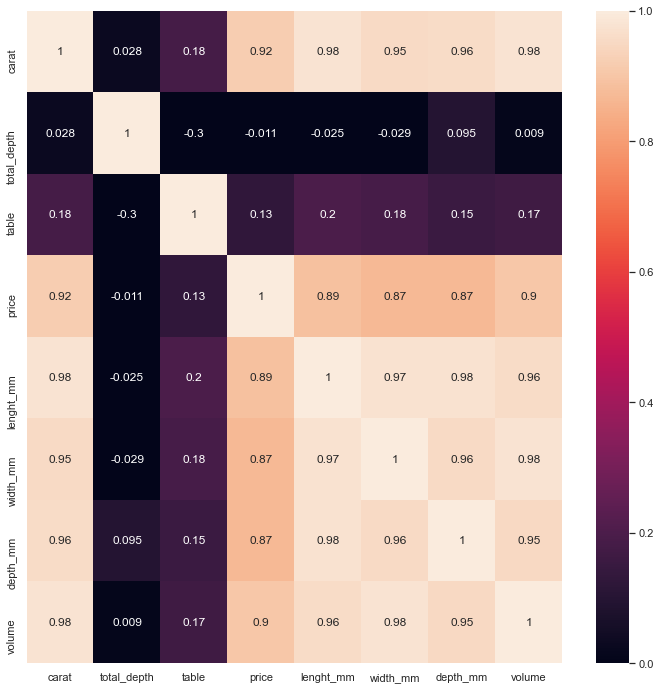

In [48]:
sns.heatmap(corr, annot=True,vmin=0, vmax=1)

## Feature Enginnering 

### True that we generated the volume variable to combine the lenght_mm, width_mm, depth_mm together, Therefore, I will have to drop the lenght_mm, width_mm, depth_mm so I will not run into a collinearlity problem.  Additionally, from the visulization, it seems it  is better to deal with the log of diamonds price rather than the diamonds orginial price feature. Finally, the catergorical variables have to be transfered into dummy variables. 

In [49]:
diamonds.drop(["lenght_mm","width_mm", "depth_mm"], axis = 1, inplace = True) 

In [50]:
diamonds

,carat,cut,color,clarity,total_depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [51]:
diamonds = pd.get_dummies(diamonds, columns=["cut", "color", "clarity"], drop_first=True)

In [52]:
diamonds["price"] = diamonds["price"].apply(np.log)

In [53]:
diamonds

,carat,total_depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,5.786897,38.202030,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,5.786897,34.505856,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,5.789960,38.076885,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,5.811141,46.724580,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,5.814131,51.917250,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,7.921898,115.920000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,7.921898,118.110175,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,7.921898,114.449728,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,7.921898,140.766120,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


## Feature selection 

In [54]:
x = diamonds.drop(["price"], axis = 1) 
y = diamonds["price"]

In [55]:
all_features = x.columns
all_features

Index(['carat', 'total_depth', 'table', 'volume', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [56]:
selector1 = SelectKBest(k=15, score_func=f_regression)

In [57]:
selector1.fit(x,y)

SelectKBest(k=15, score_func=<function f_regression at 0x7fbaf6caa7a0>)

In [58]:
selector1.scores_

array([2.98092182e+05, 3.99027544e-02, 1.38471300e+03, 2.34438292e+05,
       1.64680832e+01, 7.67161664e+02, 4.88579750e+02, 2.13998883e+00,
       5.04676082e+02, 6.66568893e+00, 1.09919543e-01, 1.65808328e+02,
       3.28625258e+02, 3.73811095e+02, 2.63117543e+02, 6.28216362e+01,
       1.60093161e+03, 3.59735215e+01, 8.68440608e+00, 8.31810978e+02,
       3.58061163e+02])

In [59]:
selected_features_idx = selector1.get_support(indices=True)
selected_features_idx

array([ 0,  2,  3,  5,  6,  8, 11, 12, 13, 14, 15, 16, 17, 19, 20])

In [60]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['carat', 'table', 'volume', 'cut_Ideal', 'cut_Premium', 'color_E',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [61]:
x = x[selected_features]
y = diamonds['price']

## Feature Scailing

In [62]:
scaler = RobustScaler()

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [64]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Model Selection 

In [65]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [66]:
model_lr = LinearRegression()
model_lr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = model_lr, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_lr.predict(x_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % model_lr.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Linear Regression #######
Score : 0.8833
[0.88339763 0.87901184 0.87737013 0.8729898  0.85582275]

MSE    : 0.12 
MAE    : 0.27 
RMSE   : 0.34 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [67]:
poly = PolynomialFeatures(degree=2)# it can be seen that some variables are more closer to draw polynomial function
## with the diamonds price. Therefore, it will be a good idea to use the x_train_poly and x_test_poly from degree 2

In [68]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [69]:
model_lr = LinearRegression()
model_lr.fit(x_train_poly , y_train)
accuracies = cross_val_score(estimator = model_lr, X = x_train_poly, y = y_train ,cv = 5,verbose = 1)
y_pred = model_lr.predict(x_test_poly)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % model_lr.score(x_test_poly, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9684
[ 0.97062385  0.95235157  0.96264731  0.96923196 -5.85332504]

MSE    : 0.03 
MAE    : 0.13 
RMSE   : 0.18 
R2     : 0.97 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [70]:
model_R = Ridge(normalize=True)
model_R.fit(x_train , y_train)
accuracies = cross_val_score(estimator = model_R, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_R.predict(x_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % model_R.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Linear Regression #######
Score : 0.7516
[0.74679478 0.7451248  0.7452432  0.7467711  0.73308284]

MSE    : 0.25 
MAE    : 0.42 
RMSE   : 0.50 
R2     : 0.75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [71]:
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
model_gbr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = model_gbr, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_gbr.predict(x_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % model_gbr.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

      Iter       Train Loss   Remaining Time 
         1           0.8912            3.13s
         2           0.7742            2.23s
         3           0.6761            1.84s
         4           0.5949            1.63s
         5           0.5245            1.49s
         6           0.4659            1.41s
         7           0.4146            1.34s
         8           0.3722            1.28s
         9           0.3348            1.23s
        10           0.3034            1.20s
        20           0.1401            1.00s
        30           0.0905            0.85s
        40           0.0739            0.70s
        50           0.0664            0.59s
        60           0.0612            0.48s
        70           0.0570            0.35s
        80           0.0533            0.23s
        90           0.0500            0.12s
       100           0.0472            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8912            1.40s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20           0.1402            0.83s
        30           0.0906            0.73s
        40           0.0740            0.61s
        50           0.0664            0.51s
        60           0.0612            0.40s
        70           0.0569            0.30s
        80           0.0531            0.20s
        90           0.0499            0.10s
       100           0.0471            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8903            1.03s
         2           0.7734            1.13s
         3           0.6757            1.07s
         4           0.5944            1.05s
         5           0.5243            1.02s
         6           0.4656            1.00s
         7           0.4145            0.98s
         8           0.3717            0.97s
         9           0.3348            0.95s
        10           0.3037            0.94s
        20           0.1399            0.80s
        30           0.0901            0.70s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


In [72]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train , y_train)
accuracies = cross_val_score(estimator = model_rf, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_rf.predict(x_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % model_rf.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.9s finished



###### Random Forest ######
Score : 0.9767
[0.97967102 0.97749017 0.97969388 0.97934058 0.97854351]

MSE    : 0.02 
MAE    : 0.11 
RMSE   : 0.15 
R2     : 0.98 


In [ ]:
## Therefore, the best used model here is RandomForestRegressor, followed by polynomial regression and then the 
## Gradient Boosting Regression 